### LEVEL 1 - TASK 1

### Task: Top Cuisines
- Determine the top three most common cuisines in the dataset.
- Calculate the percentage of restaurants that serve each of the top cuisines.


In [3]:
import pandas as pd
df = pd.read_csv('Cleaned_Restaurant_Data.csv')
df

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Base Locality,Locality Verbose,Longitude,Latitude,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City",Century City Mall,"Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City",Little Tokyo,"Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City",Edsa Shangri-La,"Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, Sm Megamall, O...","Sm Megamall, Ortigas, Mandaluyong City",Sm Megamall,"Sm Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, Sm Megamall, Ortigas...","Sm Megamall, Ortigas, Mandaluyong City",Sm Megamall,"Sm Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,Naml Gurme,208,Stanbul,"Kemanke Karamustafa Paa Mahallesi, Rhtm Caddes...",KarakY,KarakY,"KarakY, Stanbul",28.977392,41.022793,...,Turkish Lira(Tl),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz Aac,208,Stanbul,"Kouyolu Mahallesi, Muhittin StNda Caddesi, No ...",Kouyolu,Kouyolu,"Kouyolu, Stanbul",29.041297,41.009847,...,Turkish Lira(Tl),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,Stanbul,"KuruEme Mahallesi, Muallim Naci Caddesi, No 56...",KuruEme,KuruEme,"KuruEme, Stanbul",29.034640,41.055817,...,Turkish Lira(Tl),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,Ak Kahve,208,Stanbul,"KuruEme Mahallesi, Muallim Naci Caddesi, No 64...",KuruEme,KuruEme,"KuruEme, Stanbul",29.036019,41.057979,...,Turkish Lira(Tl),No,No,No,No,4,4.0,Green,Very Good,901


In [13]:
# 1. Determine the top three most common cuisines in the dataset.
top_cuisines = df['Cuisines'].value_counts().head(3) # value_counts() counts how many times each unique value in the Cuisines column appears. 
top_cuisines

Cuisines
North Indian             936
North Indian, Chinese    511
Chinese                  354
Name: count, dtype: int64

In [21]:
# 2. Calculate the percentage of restaurants that serve each of the top cuisines.
total_restaurants = df['Restaurant Name'].nunique() # It counts the number of distinct values in a column or DataFrame.
restaurant_percentage = (top_cuisines / total_restaurants) * 100
# Round and add % symbol
restaurant_percentage = restaurant_percentage.round(2).astype(str) + '%'
restaurant_percentage

Cuisines
North Indian             12.59%
North Indian, Chinese     6.88%
Chinese                   4.76%
Name: count, dtype: object

### LEVEL 1 - TASK 2

### Task: City Analysis
- Identify the city with the highest number of restaurants in the dataset.
- Calculate the average rating for restaurants in each city.
- Determine the city with the highest average rating.


In [100]:
# 1. Identify the city with the highest number of restaurants in the dataset.
city_counts = df['City'].value_counts() # counts the cities 
top_city = city_counts.idxmax() # gives name of the city with maximum entries

# .max() --> gives the number of cities
# .idxmax() --> gives the name of the city

no_of_restaurants = city_counts.max()
print(f"City with highest number of restaurants is: {top_city}({no_of_restaurants} restaurants)")


City with highest number of restaurants is: New Delhi(5473 restaurants)


In [98]:
# 2. Calculate the average rating for restaurants in each city.

avg_rating_per_city = df.groupby('City')['Aggregate rating'].mean().sort_values(ascending=False)
avg_rating_per_city = round(avg_rating_per_city, 2)
print("\nAverage rating for restaurants in each city:", avg_rating_per_city) 



Average rating for restaurants in each city: City
Inner City          4.90
Quezon City         4.80
Makati City         4.65
Pasig City          4.63
Mandaluyong City    4.62
                    ... 
New Delhi           2.44
Montville           2.40
Mc Millan           2.40
Noida               2.04
Faridabad           1.87
Name: Aggregate rating, Length: 141, dtype: float64


In [80]:
# 3. City with the highest average rating

top_city_rating = avg_rating_per_city.idxmax()
highest_avg_rating = avg_rating_per_city.max()

print(f"City with highest average rating: {top_city_rating}({highest_avg_rating:.2f})")

City with highest average rating: Inner City(4.90)


### LEVEL 1 - TASK 3

### Task: Price Range Distribution
- Create a histogram or bar chart to visualize the distribution of price ranges among the restaurants.
- Calculate the percentage of restaurants in each price range category.


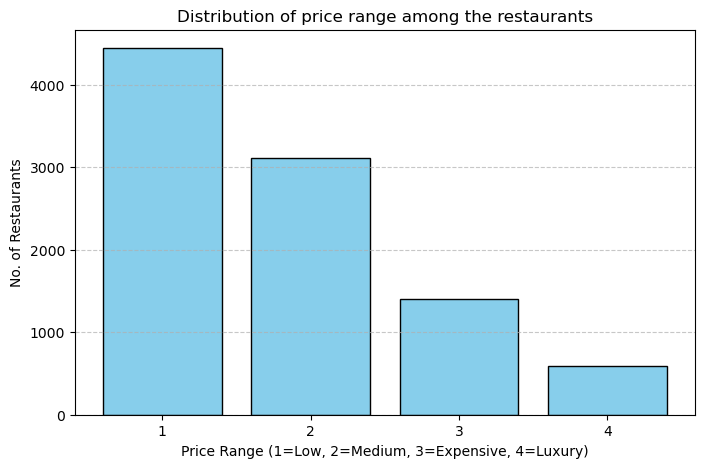

In [11]:
# 1. Create a histogram or bar chart to visualize the distribution of price ranges among the restaurants.
import matplotlib
import matplotlib.pyplot as plt
price_range_counts = df['Price range'].value_counts().sort_index() # counts the freq of each price range
plt.figure(figsize=(8,5))
plt.bar(price_range_counts.index.astype(str), price_range_counts.values, color = 'skyblue', edgecolor = 'black')
plt.title('Distribution of price range among the restaurants')
plt.xlabel("Price Range (1=Low, 2=Medium, 3=Expensive, 4=Luxury)") # labels-low, mid, exp, lux are in terms of cost
plt.ylabel("No. of Restaurants")
plt.xticks(ticks=price_range_counts.index.astype(str)) # sets what values appear on the x-axis and how they're labeled.
# price_range_counts.index.astype(str) gives the unique values of the 'Price range' column like 1,2,3,4 and then converts it to string
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [13]:
# 2. Calculate the percentage of restaurants in each price range category.
total_restaurants = df['Restaurant Name'].nunique()
price_range_counts = df['Price range'].value_counts().sort_index()

price_range_pct = (price_range_counts / total_restaurants) * 100
price_range_pct = round(price_range_pct, 2)

print("Percentage of restaurants in each price range category: ", price_range_pct)

Percentage of restaurants in each price range category:  Price range
1    59.80
2    41.89
3    18.95
4     7.88
Name: count, dtype: float64


### LEVEL 1 - Task 4

### Task: Online Delivery
- Determine the percentage of restaurants that offer online delivery.
- Compare the average ratings of restaurants with and without online delivery.

In [92]:
# 1. Determine the percentage of restaurants that offer online delivery.
total_restaurants = df['Restaurant Name'].nunique() # Counts unique restaurants in the entire dataset
has_online_delivery = df[df['Has Online delivery'] == 'Yes']['Restaurant Name'].nunique() # Counts unique restaurants only with online delivery
restaurant_per_online = (total_restaurants/has_online_delivery) * 100
restaurant_per_online = round(restaurant_per_online, 2)

# We use built-in round() because our calculation results in a single float value, not a pandas Series
# Pandas .round() is for when you have multiple values (Series/DataFrame), built-in round() is for single values

print(f"Percentage of restaurants with online delivery: {restaurant_per_online}%")

Percentage of restaurants with online delivery: 430.59%


In [96]:
# 2. Compare the average ratings of restaurants with and without online delivery.

avg_rating_with_delivery = df[df['Has Online delivery'] == 'Yes']['Aggregate rating'].mean()
avg_rating_without_delivery = df[df['Has Online delivery'] == 'No']['Aggregate rating'].mean()

avg_rating_with_delivery = round(avg_rating_with_delivery, 2)
avg_rating_without_delivery = round(avg_rating_without_delivery, 2)

print(f"Average rating of restaurants WITH online delivery: {avg_rating_with_delivery}")
print(f"Average rating of restaurants WITHOUT online delivery: {avg_rating_without_delivery}")


Average rating of restaurants WITH online delivery: 3.25
Average rating of restaurants WITHOUT online delivery: 2.47
